# Exploring data from NASA's Center for Near Earth Objects (NEOs)
#### This workbook is simply for demo purposes (and your enjoyment!)
### https://cneos.jpl.nasa.gov/about/

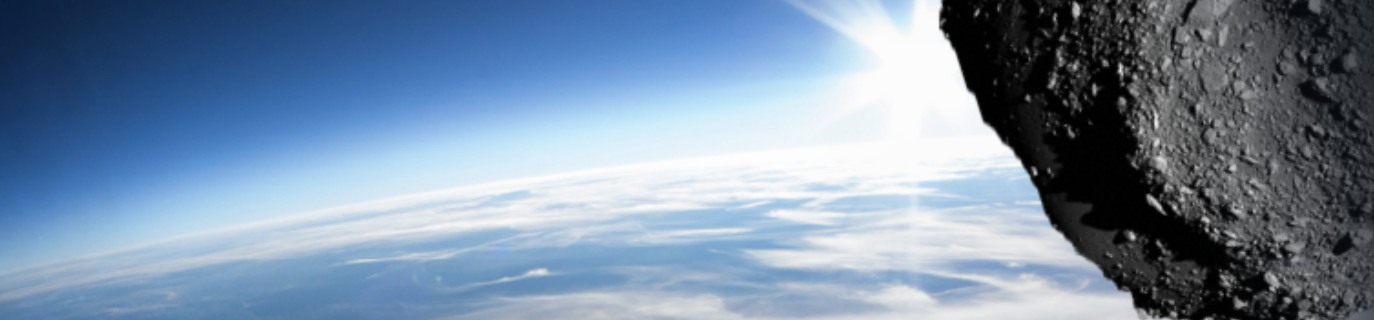

In [3]:
from IPython.display import Image
Image(filename='neo_image1.png') 

#### First we'll load our Python visualization libraries.

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

#### Then import select columns from our dataset with Pandas.

In [66]:
# Make a column list and use it to read only select data from our larger dataset
col_list = ['spkid', 'full_name', 'q', 'moid', 'class', 'n', 'diameter', 'rot_per', 'per', 'epoch.cal', 'tp.cal', 'first_obs', 'last_obs', 'H', 'pha']
df = pd.read_csv('cneos_data.csv', usecols=col_list)

# Rename the columns that we have selected to make them easier toidentify
df.columns = ['ID', 'Object Name', 'Potentially Hazardous Asteroid', 'Absolute Magnitude', 'Diameter', 'Rotation Period', 'Epoch of Osculation', 'Perihelion Distance', 'Mean Motion', 'Time of Perihelion Passage', 'Days to Orbit Sun', 'MOID Distance', 'Orbit Class', 'Date of First Observation', 'Date of Last Observation']


#### Let's take a quick look at the first few rows of data (see Glossary at the end of notebook for data descriptions).

In [67]:
# display all columns and the first 5 rows
df.head()

ID               Object Name Potentially Hazardous Asteroid  \
0  2000433        433 Eros (A898 PA)                              N   
1  2000719      719 Albert (A911 TB)                              N   
2  2000887      887 Alinda (A918 AA)                              N   
3  2001036    1036 Ganymed (A924 UB)                              N   
4  2001221      1221 Amor (1932 EA1)                              N   

   Absolute Magnitude  Diameter  Rotation Period Epoch of Osculation  \
0               10.43    16.840            5.270        2022-01-21.0   
1               15.51       NaN            5.801        2022-01-21.0   
2               13.87     4.200           28.410        2022-01-21.0   
3                9.25    37.675           10.297        2022-01-21.0   
4               17.39     1.000              NaN        2022-01-21.0   

   Perihelion Distance  Mean Motion Time of Perihelion Passage  \
0                1.133       0.5597               2022-08-11.1   
1                1.195       0.2301               2023-01-11.5   
2                1.062       0.2534               2021-02-13.2   
3                1.245       0.2264               2020-05-09.8   
4                1.082       0.3708               2022-10-14.8   

   Days to Orbit Sun  MOID Distance Orbit Class Date of First Observation  \
0              643.0         0.1490         AMO                1893-10-29   
1             1560.0         0.2030         AMO                1911-10-04   
2             1420.0         0.0815         AMO                1918-02-03   
3             1590.0         0.3450         AMO                1924-10-23   
4              971.0         0.1060         AMO                1932-03-12   

  Date of Last Observation  
0               2021-05-13  
1               2021-04-17  
2               2021-07-31  
3               2021-12-15  
4               2021-12-05

#### Now to more easily visualize our data let's seperate asteroids from comets by their orbit class.

In [68]:
asteroids = df[df['Orbit Class'].isin(['IEO', 'ATE', 'APO', 'AMO'])]
comets = df[df['Orbit Class'].isin(['JFC', 'HTC', 'ETc', 'JFc'])]

#### Viewing the data below we see that by far the largest distribution of NEOs by orbit class are asteroids.

#### In addition we see how each orbit class compares by (perihelion) distance from the sun in relation to mean motion.

There are (27831) total asteroids, making up 99.31% of all NEOs.


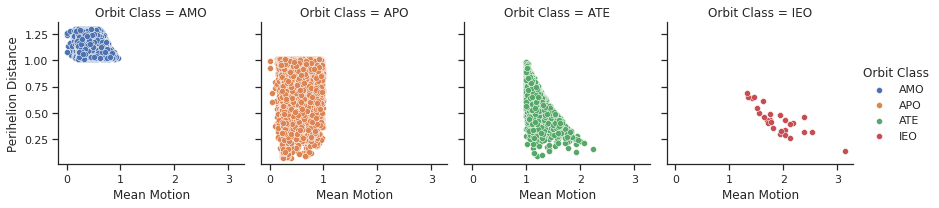

In [69]:
total_neo = len(df)
total_asteroids = len(asteroids)
total_comets = len(comets)
percent_asteroids = round((total_asteroids / total_neo) * 100,2)
percent_comets = round((total_comets / total_neo) * 100,2)

g = sns.FacetGrid(asteroids, col='Orbit Class', hue='Orbit Class')
g.map(sns.scatterplot, 'Mean Motion', 'Perihelion Distance')
g.add_legend()

print("There are (" + str(total_asteroids) + ") total asteroids, making up " + str(percent_asteroids) + "% of all NEOs.")

#### With asteroids, we can see that Orbit Class (AMO) and (APO) are divided at a Perihelion Distance of 1.00.

#### Comets by comparison have a smaller distribution among NEOs.

There are (192) total comets, making up 0.69% of total NEOs.


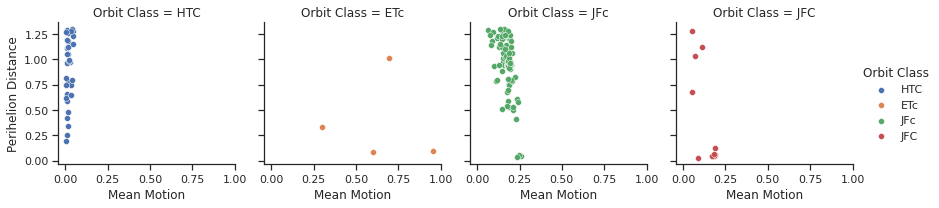

In [70]:
g = sns.FacetGrid(comets, col='Orbit Class', hue='Orbit Class')
g.map(sns.scatterplot, 'Mean Motion', 'Perihelion Distance')
g.add_legend()

print("There are (" + str(total_comets) + ") total comets, making up " + str(percent_comets) + "% of total NEOs.")

#### And we can see below when comets where first observed in relation to (MOID) Earth Minimum Orbit Intersection Distance (au).

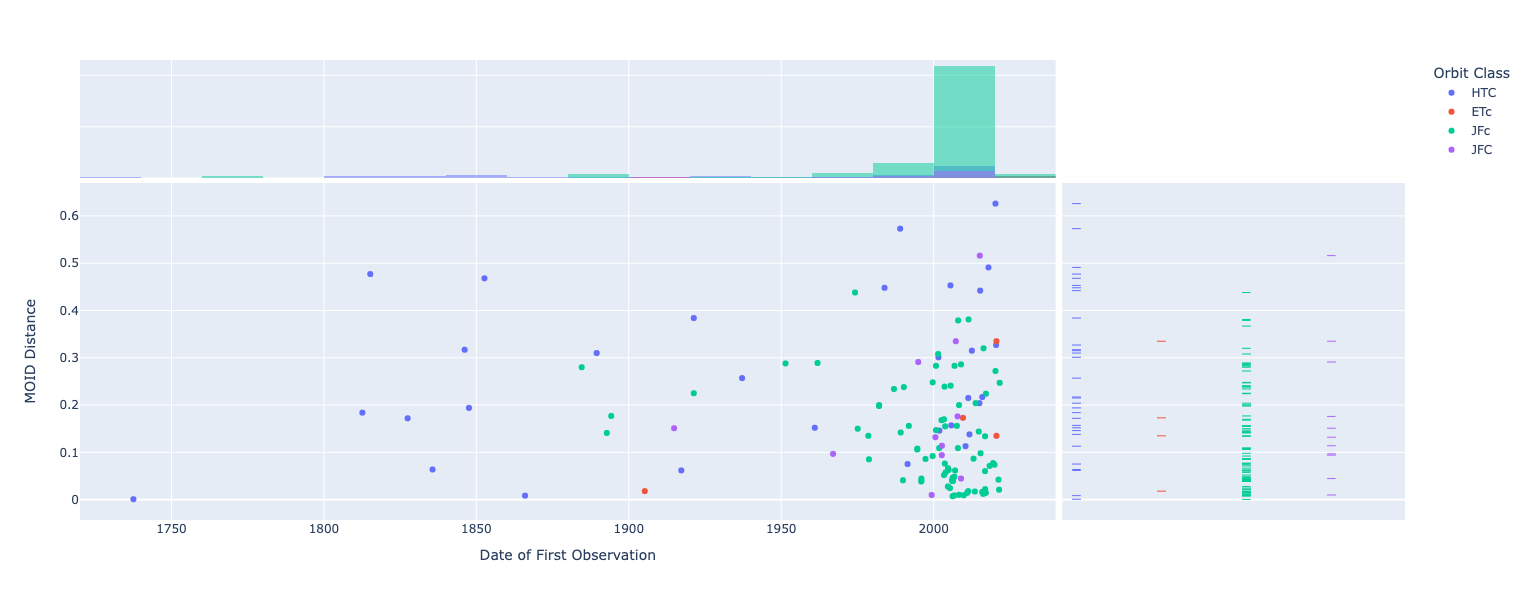

So far there are a total of (192) comets observed.


In [86]:
fig = px.scatter(comets, x='Date of First Observation', y='MOID Distance', color='Orbit Class',
                 marginal_x='histogram', marginal_y='rug', hover_data=['Object Name'], height=600)
fig.show()

print("So far there are a total of (" + str(total_comets) + ") comets observed.")

#### This means the majority of comets have been observed in the last two decades compared to all time.

#### Now lets take a closer look at asteroids comparing their breakdown of mean motion by absolute magnitude.

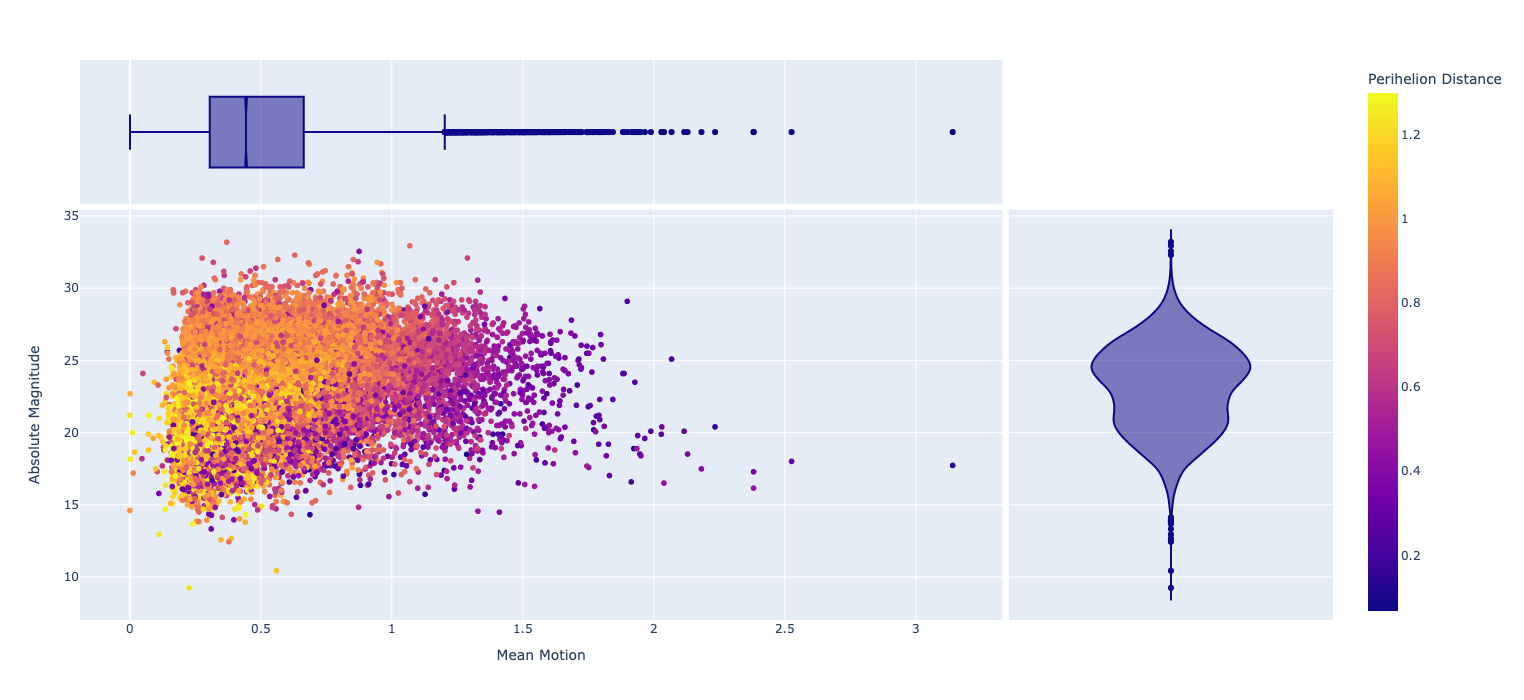

In [85]:
fig = px.scatter(asteroids, x='Mean Motion', y='Absolute Magnitude', color='Perihelion Distance', 
                 marginal_x='box', marginal_y='violin', height=700)
fig.show()

#### And view stats on our asteroid data.

In [81]:
asteroids.describe()

ID  Absolute Magnitude     Diameter  Rotation Period  \
count  2.783100e+04        27827.000000  1248.000000      1882.000000   
mean   1.371077e+07           23.156607     1.032748        18.199485   
std    2.034686e+07            2.954413     1.651055        74.999553   
min    2.000433e+06            9.250000     0.002500         0.003298   
25%    3.471972e+06           20.900000     0.309750         2.246625   
50%    3.745509e+06           23.400000     0.629000         4.773500   
75%    3.872630e+06           25.400000     1.245250        11.467500   
max    5.423494e+07           33.200000    37.675000      1880.000000   

       Perihelion Distance   Mean Motion  Days to Orbit Sun  MOID Distance  
count         27831.000000  27831.000000       2.783100e+04   2.779800e+04  
mean              0.915163      0.522849       1.025789e+03   9.020394e-02  
std               0.229122      0.282478       1.500077e+04   1.006474e-01  
min               0.070000      0.000175       1.150000e+02   1.820000e-07  
25%               0.788000      0.305300       5.420000e+02   1.450000e-02  
50%               0.964000      0.443600       8.120000e+02   4.990000e-02  
75%               1.065000      0.664000       1.180000e+03   1.370000e-01  
max               1.300000      3.141000       2.060000e+06   7.080000e-01

#### Here we can see the overlap of potentially hazardous asteroids based on absolute magnitude and nearest earth intersection (MOID). 

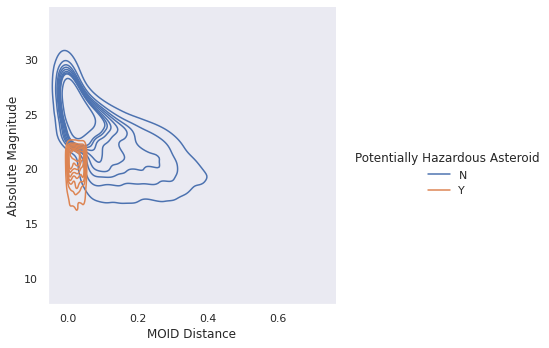

In [75]:
sns.displot(df, x='MOID Distance', y='Absolute Magnitude', hue='Potentially Hazardous Asteroid', kind='kde')

#### And see a comparison of multiple attributes for comets as well.

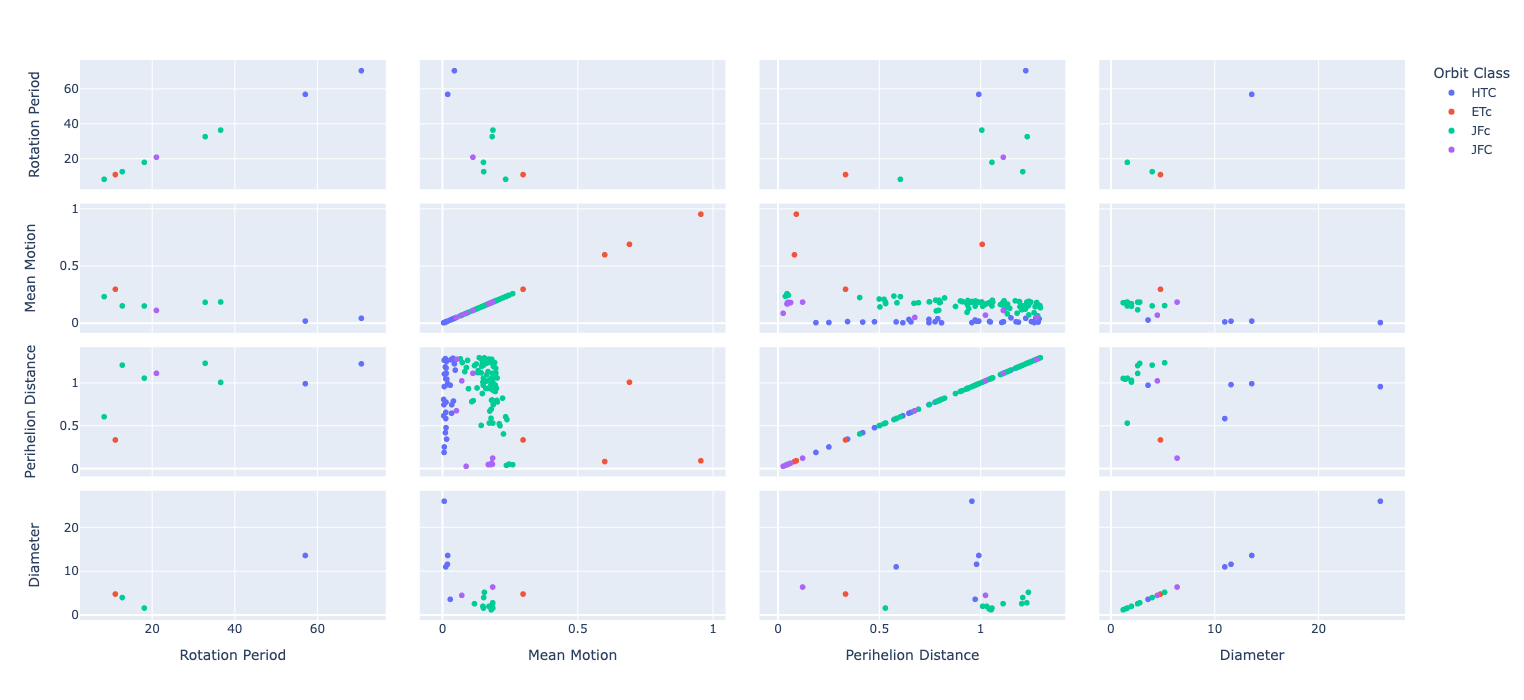

In [76]:
fig = px.scatter_matrix(comets,
    dimensions=['Rotation Period', 'Mean Motion', 'Perihelion Distance', 'Diameter'],
    color='Orbit Class', height=700)
fig.show()

## Some key terms to understand

#### Neos: 
NEOs are a broad category of small-bodies defined as those with a trajectory that can come within 1.3 au of the Sun. Since the Earth orbits at approximately 1 au, such objects can in principle come within 0.3 au of Earth. However, being in the NEO category doesn’t mean they are actually close to Earth at any paticular time, only that their motion can, at times, bring them close to the Sun and possibly Earth. https://ssd.jpl.nasa.gov/sb/neos.html

#### au: 
One Astronomical Unit (au) is approximately 150 million kilometers, a convenient unit of measure for distance in the Solar System being approximately equal to the average Sun-Earth distance.
#### LD: 
One Lunar Distance (LD) is approximately 384,000 kilometers

#### Another great way to learn more about NEOs is to interact with them live on "Eyes on Asteroids" from NASA.
##### https://www.nasa.gov/feature/jpl/nasa-s-eyes-on-asteroids-reveals-our-near-earth-object-neighborhood

In [77]:
%%html
<iframe src="https://eyes.nasa.gov/apps/asteroids/#/asteroids" width="1100" height="600"></iframe>

## DATA GLOSSARY

#### ID
Object identification number.

#### Object Name
Object full name/designation.

#### Potentially Hazardous Asteroid
Potentially Hazardous Asteroid (PHA) flag. (Y/N)

#### Absolute Magnitude
Asteroid absolute magnitude (in general, smaller H implies larger asteroid diameter). Undefined for comets.

#### Diameter
Diameter value when known or a range (min - max) estimated using the asteroid's absolute magnitude (H) and limiting albedos of 0.25 and 0.05.

#### Rotation Period
Sidereal rotation period, i.e. the time that the object takes to complete a single revolution.

#### Epoch of Osculation
Epoch (period in time) of osculation in calendar date/time form. The instant of time at which the position and velocity vectors are specified. (TDB)

#### Perihelion Distance
Perihelion distance (au): The perihelion distance is the closest distance from the object to the sun. Good data for an initial idea of the distribution of objects in the solar system.

#### Mean Motion
Mean motion. (deg/d)

#### Time of Perihelion Passage
The date and time at which an object orbiting the sun is at its closest to the sun. (TDB)

#### Days to Orbit Sun
Total number of days to complete one orbit of the sun.

#### MOID Distance
Earth minimum orbit intersection distance. (au)

#### Orbit Class
NEO orbit classification.

#### Date of First Observation
Date of first observation used in the orbit fit. (UT)

#### Date of Last Observation
Date of last observation used in the orbit fit. (UT)
